# Data Import and Cleansing

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Read data from text file to Pandas dataframe
data = pd.read_csv('lebron-2018.txt', sep=",")
data.head()

,Rk,G,Date,Age,Tm,@,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2019-10-22,34-296,LAL,@,LAC,L (-10),1,36:00,...,9,10,8,1,1,5,3,18,11.6,-8
1,2,2.0,2019-10-25,34-299,LAL,NaN,UTA,W (+9),1,30:34,...,5,7,10,1,0,1,0,32,30.9,+17
2,3,3.0,2019-10-27,34-301,LAL,NaN,CHO,W (+19),1,35:01,...,5,6,12,1,0,4,0,20,20.6,+17
3,4,4.0,2019-10-29,34-303,LAL,NaN,MEM,W (+29),1,28:19,...,2,2,8,0,1,6,0,23,15.8,+2
4,5,5.0,2019-11-01,34-306,LAL,@,DAL,W (+9),1,42:32,...,12,12,16,4,1,4,5,39,40.8,+15


In [3]:
# Check size of dataframe by rows,cols
data.shape

(1303, 30)

In [4]:
# View all column names
data.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', '@', 'Opp', 'Result', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [5]:
# Drop columns and save in new dataframe called "lebron"
lebron = data.drop(['Rk','Age','GS'],axis=1)

In [6]:
# View the info for the dataframe, including size of dataframe, entry count and datatype for each column
lebron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 27 columns):
G         1205 non-null float64
Date      1303 non-null object
Tm        1303 non-null object
@         652 non-null object
Opp       1303 non-null object
Result    1303 non-null object
MP        1303 non-null object
FG        1303 non-null object
FGA       1303 non-null object
FG%       1303 non-null object
3P        1303 non-null object
3PA       1303 non-null object
3P%       1263 non-null object
FT        1303 non-null object
FTA       1303 non-null object
FT%       1290 non-null object
ORB       1303 non-null object
DRB       1303 non-null object
TRB       1303 non-null object
AST       1303 non-null object
STL       1303 non-null object
BLK       1303 non-null object
TOV       1303 non-null object
PF        1303 non-null object
PTS       1303 non-null object
GmSc      1303 non-null object
+/-       1303 non-null object
dtypes: float64(1), object(26)
memory usage: 274.9+ KB


In [7]:
# Convert 'Date' column to datetime using the Pandas to_datetime() built-in function
lebron['Date'] = pd.to_datetime(lebron['Date'])

In [8]:
# Check 'Date' column again
lebron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 27 columns):
G         1205 non-null float64
Date      1303 non-null datetime64[ns]
Tm        1303 non-null object
@         652 non-null object
Opp       1303 non-null object
Result    1303 non-null object
MP        1303 non-null object
FG        1303 non-null object
FGA       1303 non-null object
FG%       1303 non-null object
3P        1303 non-null object
3PA       1303 non-null object
3P%       1263 non-null object
FT        1303 non-null object
FTA       1303 non-null object
FT%       1290 non-null object
ORB       1303 non-null object
DRB       1303 non-null object
TRB       1303 non-null object
AST       1303 non-null object
STL       1303 non-null object
BLK       1303 non-null object
TOV       1303 non-null object
PF        1303 non-null object
PTS       1303 non-null object
GmSc      1303 non-null object
+/-       1303 non-null object
dtypes: datetime64[ns](1), float64(1), object(25

In [9]:
# Sort dataframe by values for the 'Date' column
lebron = lebron.sort_values(by='Date')

In [10]:
lebron.head()

,G,Date,Tm,@,Opp,Result,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
1221,1.0,2003-10-29,CLE,@,SAC,L (-14),42:50,12,20,.600,...,4,6,9,4,0,2,3,25,24.7,-9
1222,2.0,2003-10-30,CLE,@,PHO,L (-9),40:21,8,17,.471,...,10,12,8,1,0,7,1,21,14.7,-3
1223,3.0,2003-11-01,CLE,@,POR,L (-19),39:10,3,12,.250,...,4,4,6,2,0,2,3,8,5.0,-21
1224,4.0,2003-11-05,CLE,NaN,DEN,L (-4),41:06,3,11,.273,...,9,11,7,2,3,2,1,7,11.2,-3
1225,5.0,2003-11-07,CLE,@,IND,L (-1),43:44,8,18,.444,...,5,5,3,0,0,7,2,23,9.0,-7


In [11]:
# View all unique values for the points column
lebron.PTS.unique()

array(['25', '21', '8', '7', '23', '17', '18', '10', '22', '14', '28',
       '19', '15', '6', '33', '4', '37', '27', '36', '32', '34', '16',
       '29', 'Inactive', '20', '38', '12', '24', '9', '11', '30', '26',
       '41', '31', '13', '43', '40', '3', '35', 'Did Not Dress', '56',
       '44', '52', '39', '46', '51', '47', '45', '50', '42', '55', '48',
       'Did Not Play', '61', 'Not With Team', '57'], dtype=object)

In [12]:
# Remove any row with "Inactive" values from dataframe
lebron = lebron[lebron.PTS != "Inactive"]

In [13]:
# Ensure rows were removed
lebron.shape

(1239, 27)

In [14]:
# Remove any row with "Did Not Dress" values from dataframe
lebron = lebron[lebron.PTS != "Did Not Dress"]

In [15]:
# Ensure rows were removed
lebron.shape

(1218, 27)

In [16]:
# Remove any row with "Not With Team" values from dataframe
lebron = lebron[lebron.PTS != "Not With Team"]

In [17]:
# Ensure rows were removed
lebron.shape

(1216, 27)

In [18]:
# Remove any row with "Did Not Play" values from dataframe
lebron = lebron[lebron.PTS != "Did Not Play"]

In [19]:
# Ensure rows were removed
lebron.shape

(1205, 27)

In [20]:
# Re-check unique values in the points column
lebron.PTS.unique()

array(['25', '21', '8', '7', '23', '17', '18', '10', '22', '14', '28',
       '19', '15', '6', '33', '4', '37', '27', '36', '32', '34', '16',
       '29', '20', '38', '12', '24', '9', '11', '30', '26', '41', '31',
       '13', '43', '40', '3', '35', '56', '44', '52', '39', '46', '51',
       '47', '45', '50', '42', '55', '48', '61', '57'], dtype=object)

In [21]:
# Comvert column datatype from object to int using Pandas .astype() function
lebron['PTS'] = lebron['PTS'].astype(int)

In [22]:
# Verify dtype to be int64
lebron.PTS.dtype

dtype('int64')

In [23]:
# Split the string values on the colon and save into a new variable "minutes"
minutes = lebron['MP'].str.split(':')

In [24]:
# Check that values were split properly
minutes[0:10]

1221    [42, 50]
1222    [40, 21]
1223    [39, 10]
1224    [41, 06]
1225    [43, 44]
1226    [44, 30]
1227    [33, 39]
1228    [42, 40]
1229    [35, 36]
1230    [46, 57]
Name: MP, dtype: object

In [25]:
# Use lambda to divide the second number by 60 to convert from seconds to minutes then append to first number
minutes = minutes.apply(lambda x: int(x[0]) + int(x[1])/60)

In [26]:
# Update the MP column with these new values
lebron.MP = minutes

In [27]:
# Ensure minutes played column is the correct datatype
lebron.MP.dtype

dtype('float64')

In [28]:
# Reset index
lebron = lebron.set_index('Date')

In [29]:
# Check dataframe for MP to be in decimal form
lebron.head()

,G,Tm,@,Opp,Result,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
Date,,,,,,,,,,,,,,,,,,,,,
2003-10-29,1.0,CLE,@,SAC,L (-14),42.833333,12,20,.600,0,...,4,6,9,4,0,2,3,25,24.7,-9
2003-10-30,2.0,CLE,@,PHO,L (-9),40.350000,8,17,.471,1,...,10,12,8,1,0,7,1,21,14.7,-3
2003-11-01,3.0,CLE,@,POR,L (-19),39.166667,3,12,.250,0,...,4,4,6,2,0,2,3,8,5.0,-21
2003-11-05,4.0,CLE,NaN,DEN,L (-4),41.100000,3,11,.273,0,...,9,11,7,2,3,2,1,7,11.2,-3
2003-11-07,5.0,CLE,@,IND,L (-1),43.733333,8,18,.444,1,...,5,5,3,0,0,7,2,23,9.0,-7


In [30]:
# Create dictionary with all columns as keys and all intended datatypes and values
convert_dict = {'FG': int, 
                'FGA': int,
                'FG': int, 
                'FG%': float,
                '3P': int, 
                '3PA': int,
                '3P%': float, 
                'FT': int,
                'FTA': int, 
                'FT%': float,
                'ORB': int,
                'DRB': int, 
                'TRB': int,
                'AST': int,
                'STL': int, 
                'BLK': int,
                'TOV': int,
                'PF': int, 
                'PTS': int,
                'GmSc': float,
                '+/-': int
               }

In [31]:
# Pass in conversion dictionary to the .astype() function to the dataframe
lebron = lebron.astype(convert_dict) 

In [32]:
# Check dtypes
lebron.dtypes

G         float64
Tm         object
@          object
Opp        object
Result     object
MP        float64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
GmSc      float64
+/-         int64
dtype: object

In [33]:
# Create a for loop to check for any missing values in all of the columns
for column in lebron.isnull().columns.values.tolist():
    print(column)
    print (lebron.isnull()[column].value_counts())
    print("")   

G
False    1205
Name: G, dtype: int64

Tm
False    1205
Name: Tm, dtype: int64

@
True     608
False    597
Name: @, dtype: int64

Opp
False    1205
Name: Opp, dtype: int64

Result
False    1205
Name: Result, dtype: int64

MP
False    1205
Name: MP, dtype: int64

FG
False    1205
Name: FG, dtype: int64

FGA
False    1205
Name: FGA, dtype: int64

FG%
False    1205
Name: FG%, dtype: int64

3P
False    1205
Name: 3P, dtype: int64

3PA
False    1205
Name: 3PA, dtype: int64

3P%
False    1165
True       40
Name: 3P%, dtype: int64

FT
False    1205
Name: FT, dtype: int64

FTA
False    1205
Name: FTA, dtype: int64

FT%
False    1192
True       13
Name: FT%, dtype: int64

ORB
False    1205
Name: ORB, dtype: int64

DRB
False    1205
Name: DRB, dtype: int64

TRB
False    1205
Name: TRB, dtype: int64

AST
False    1205
Name: AST, dtype: int64

STL
False    1205
Name: STL, dtype: int64

BLK
False    1205
Name: BLK, dtype: int64

TOV
False    1205
Name: TOV, dtype: int64

PF
False    1205
Name: PF,

In [34]:
lebron['3P%'].unique()

array([0.   , 0.2  , 0.5  ,   nan, 1.   , 0.4  , 0.25 , 0.667, 0.333,
       0.714, 0.167, 0.6  , 0.429, 0.444, 0.286, 0.3  , 0.538, 0.308,
       0.857, 0.545, 0.556, 0.625, 0.833, 0.375, 0.75 , 0.571, 0.143,
       0.222, 0.727, 0.8  , 0.364, 0.111, 0.7  , 0.455])

In [35]:
lebron_missing_3P = lebron[lebron['3P%'].isnull()]
lebron_missing_3P = lebron_missing_3P[['3P','3PA','3P%']]
lebron_missing_3P

,3P,3PA,3P%
Date,,,
2003-11-08,0,0,NaN
2003-12-09,0,0,NaN
2004-02-07,0,0,NaN
2004-02-18,0,0,NaN
2004-02-20,0,0,NaN
2004-02-22,0,0,NaN
2004-03-10,0,0,NaN
2004-04-02,0,0,NaN
2004-04-06,0,0,NaN


In [36]:
print(lebron_missing_3P["3P"].size)
print(lebron_missing_3P["3P%"].size)

40
40


In [37]:
lebron['FT%'].unique()

array([0.333, 0.571, 1.   , 0.857, 0.25 ,   nan, 0.667, 0.5  , 0.75 ,
       0.9  , 0.714, 0.889, 0.875, 0.833, 0.8  , 0.846, 0.6  , 0.7  ,
       0.625, 0.818, 0.778, 0.556, 0.636, 0.786, 0.733, 0.4  , 0.727,
       0.682, 0.917, 0.643, 0.   , 0.615, 0.923, 0.909, 0.933, 0.455,
       0.824, 0.938, 0.692, 0.545, 0.444, 0.533, 0.583, 0.706, 0.421,
       0.696, 0.769, 0.929, 0.813, 0.826, 0.762, 0.867, 0.462, 0.375,
       0.882, 0.467, 0.563, 0.688, 0.842, 0.684, 0.588, 0.81 , 0.773,
       0.611, 0.647, 0.789, 0.429, 0.529, 0.2  , 0.538, 0.765, 0.273])

In [38]:
lebron_missing_FT = lebron[lebron['FT%'].isnull()]
lebron_missing_FT["FT%"]

Date
2003-11-10   NaN
2003-12-03   NaN
2003-12-06   NaN
2004-03-29   NaN
2007-01-06   NaN
2008-03-21   NaN
2008-11-26   NaN
2009-12-02   NaN
2014-03-09   NaN
2014-03-10   NaN
2016-03-19   NaN
2016-12-02   NaN
2019-02-10   NaN
Name: FT%, dtype: float64

In [39]:
lebron_missing_FT["FT"]

Date
2003-11-10    0
2003-12-03    0
2003-12-06    0
2004-03-29    0
2007-01-06    0
2008-03-21    0
2008-11-26    0
2009-12-02    0
2014-03-09    0
2014-03-10    0
2016-03-19    0
2016-12-02    0
2019-02-10    0
Name: FT, dtype: int64

In [40]:
lebron.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1165.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,38.063900,38.573582,9.878008,19.595851,0.505714,1.442324,4.204149,0.309560,5.960166,8.095436,...,6.215768,7.417427,7.253112,1.616598,0.768465,3.477178,1.842324,27.158506,22.261992,5.374274
std,22.207607,5.139021,3.086928,4.831219,0.113076,1.402786,2.354359,0.250424,3.415580,4.170577,...,2.698883,3.013678,2.938998,1.301312,0.912447,1.820569,1.283049,7.868770,7.796322,12.680858
min,1.000000,10.550000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000
25%,19.000000,35.750000,8.000000,16.000000,0.435000,0.000000,3.000000,0.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,1.000000,22.000000,17.000000,-3.000000
50%,38.000000,38.850000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,5.000000,8.000000,...,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,2.000000,27.000000,22.600000,6.000000
75%,57.000000,42.083333,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,8.000000,11.000000,...,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,3.000000,32.000000,27.300000,14.000000
max,82.000000,54.683333,23.000000,36.000000,0.929000,8.000000,13.000000,1.000000,24.000000,28.000000,...,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,6.000000,61.000000,53.200000,39.000000


First, I am going to explore some basic visualiztions of various statistics of Lebron's career in regard to his minutes played.

Text(0.005, 39.35, '38.85')

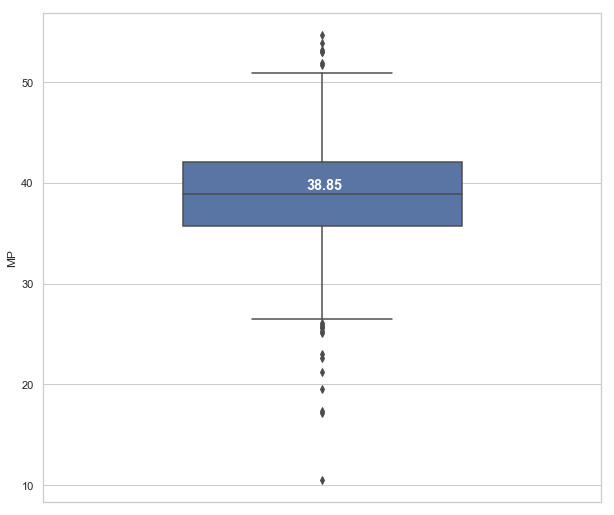

In [41]:
#Box plot of Lebron's career minutes played per game
sns.set(style="whitegrid")
plt.figure(figsize=(10, 9))
ax = sns.boxplot(x=lebron["MP"], orient="v", width=.5)

#label variable to indictae the median value of minutes played
median = lebron['MP'].median() 

ax.text(.005, median+.5, median, 
            horizontalalignment='center', size='large', color='w', weight='semibold')

In [42]:
# Create a new dataframe excluding rows where Lebron played less than 25 minutes
lebron_new = lebron[lebron['MP'] > 25]

In [43]:
lebron_new.shape

(1198, 26)

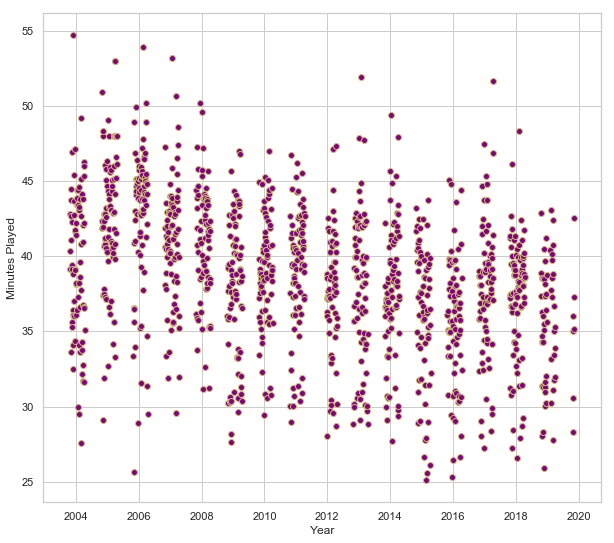

In [44]:
# Plot Lebron's minutes per game over the course of his career
plt.figure(figsize=(10, 9))
plt.scatter(lebron_new.index, lebron_new['MP'], c='purple', edgecolors='y')
plt.xlabel('Year')
plt.ylabel('Minutes Played')
plt.show()

In [45]:
import datetime

In [46]:
# Create empty list that will be populated with the correct season for each game
seasons = [None] * 1198

# Create variable start and end dates for all 17 seasons 
s1_start = '2003-10-29'
s1_end = '2004-04-14'
s2_start = '2004-11-02'
s2_end = '2005-06-22'
s3_start = '2005-11-01'
s3_end = '2006-06-22'
s4_start = '2006-10-30'
s4_end = '2007-06-14'
s5_start = '2007-10-30'
s5_end = '2008-06-17'
s6_start = '2008-10-28'
s6_end = '2009-04-15'
s7_start = '2009-10-27'
s7_end = '2010-06-17'
s8_start = '2010-10-26'
s8_end = '2011-06-12'
s9_start = '2011-12-25'
s9_end = '2012-06-26'
s10_start = '2012-10-30'
s10_end = '2013-04-17'
s11_start = '2013-10-29'
s11_end = '2014-04-16'
s12_start = '2014-10-28'
s12_end = '2015-06-16'
s13_start = '2015-10-27'
s13_end = '2016-06-19'
s14_start = '2016-10-25'
s14_end = '2017-06-18'
s15_start = '2017-10-17'
s15_end = '2018-06-17'
s16_start = '2018-10-16'
s16_end = '2019-04-10'
s17_start = '2019-10-22'
s17_end = '2019-12-30'

# List to hold all above variables to loop through
szn_dates = [s1_start, s1_end, s2_start, s2_end, s3_start, s3_end, s4_start,
             s4_end, s5_start, s5_end, s6_start, s6_end, s7_start, s7_end,
             s8_start, s8_end, s9_start, s9_end, s10_start, s10_end, s11_start,
             s11_end, s12_start, s12_end, s13_start, s13_end, s14_start, s14_end,
             s15_start, s15_end, s16_start, s16_end, s17_start, s17_end]

In [47]:
# List to populate with new generated datetime objects
szn_objects = [None] * 34

# Function to convert string variables to datetime objects
def szn_obj_gen(start_end_list, return_list):
    format_str = '%Y-%m-%d' # The format of the time strings above used to convert to datetime
    for i in range(0,len(start_end_list), 2): 
        return_list[i] = datetime.datetime.strptime(start_end_list[i], format_str)
    for x in range(1,len(start_end_list), 2): 
        return_list[x] = datetime.datetime.strptime(start_end_list[x], format_str)
    return return_list;

In [48]:
szn_obj_gen(szn_dates, szn_objects)

[datetime.datetime(2003, 10, 29, 0, 0),
 datetime.datetime(2004, 4, 14, 0, 0),
 datetime.datetime(2004, 11, 2, 0, 0),
 datetime.datetime(2005, 6, 22, 0, 0),
 datetime.datetime(2005, 11, 1, 0, 0),
 datetime.datetime(2006, 6, 22, 0, 0),
 datetime.datetime(2006, 10, 30, 0, 0),
 datetime.datetime(2007, 6, 14, 0, 0),
 datetime.datetime(2007, 10, 30, 0, 0),
 datetime.datetime(2008, 6, 17, 0, 0),
 datetime.datetime(2008, 10, 28, 0, 0),
 datetime.datetime(2009, 4, 15, 0, 0),
 datetime.datetime(2009, 10, 27, 0, 0),
 datetime.datetime(2010, 6, 17, 0, 0),
 datetime.datetime(2010, 10, 26, 0, 0),
 datetime.datetime(2011, 6, 12, 0, 0),
 datetime.datetime(2011, 12, 25, 0, 0),
 datetime.datetime(2012, 6, 26, 0, 0),
 datetime.datetime(2012, 10, 30, 0, 0),
 datetime.datetime(2013, 4, 17, 0, 0),
 datetime.datetime(2013, 10, 29, 0, 0),
 datetime.datetime(2014, 4, 16, 0, 0),
 datetime.datetime(2014, 10, 28, 0, 0),
 datetime.datetime(2015, 6, 16, 0, 0),
 datetime.datetime(2015, 10, 27, 0, 0),
 datetime.date

In [49]:
count = 0
for i in lebron_new.index:
    if i >= szn_objects[0] and i <= szn_objects[1]:
        seasons[count] = 1
        count+=1
    elif i >= szn_objects[2] and i <= szn_objects[3]:
        seasons[count] = 2
        count+=1
    elif i >= szn_objects[4] and i <= szn_objects[5]:
        seasons[count] = 3
        count+=1
    elif i >= szn_objects[6] and i <= szn_objects[7]:
        seasons[count] = 4
        count+=1
    elif i >= szn_objects[8] and i <= szn_objects[9]:
        seasons[count] = 5
        count+=1
    elif i >= szn_objects[10] and i <= szn_objects[11]:
        seasons[count] = 6
        count+=1
    elif i >= szn_objects[12] and i <= szn_objects[13]:
        seasons[count] = 7
        count+=1
    elif i >= szn_objects[14] and i <= szn_objects[15]:
        seasons[count] = 8
        count+=1
    elif i >= szn_objects[16] and i <= szn_objects[17]:
        seasons[count] = 9
        count+=1
    elif i >= szn_objects[18] and i <= szn_objects[19]:
        seasons[count] = 10
        count+=1
    elif i >= szn_objects[20] and i <= szn_objects[21]:
        seasons[count] = 11
        count+=1
    elif i >= szn_objects[22] and i <= szn_objects[23]:
        seasons[count] = 12
        count+=1
    elif i >= szn_objects[24] and i <= szn_objects[25]:
        seasons[count] = 13
        count+=1
    elif i >= szn_objects[26] and i <= szn_objects[27]:
        seasons[count] = 14
        count+=1
    elif i >= szn_objects[28] and i <= szn_objects[29]:
        seasons[count] = 15
        count+=1
    elif i >= szn_objects[30] and i <= szn_objects[31]:
        seasons[count] = 16
        count+=1
    else:
        seasons[count] = 17
        count+=1

In [50]:
# Verify that our function and loop ran correctly to return a list of 1198 items
print(len(seasons))

1198


In [51]:
# Add new 'Season' column to the dataframe using the 'seasons' list
lebron_new['Season'] = seasons

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
lebron_new["Season"].isnull().value_counts()

False    1198
Name: Season, dtype: int64

In [53]:
# Move the 'Season' column to the front of the dataframe
szn = lebron_new['Season'] # Variable to hold series
lebron_new.drop(labels=['Season'], axis=1,inplace = True) # drop 'season' column
lebron_new.insert(0, 'Season', szn) # insert 'season' column at front of dataframe
lebron_new.head()

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Season,G,Tm,@,Opp,Result,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
Date,,,,,,,,,,,,,,,,,,,,,
2003-10-29,1,1.0,CLE,@,SAC,L (-14),42.833333,12,20,0.600,...,4,6,9,4,0,2,3,25,24.7,-9
2003-10-30,1,2.0,CLE,@,PHO,L (-9),40.350000,8,17,0.471,...,10,12,8,1,0,7,1,21,14.7,-3
2003-11-01,1,3.0,CLE,@,POR,L (-19),39.166667,3,12,0.250,...,4,4,6,2,0,2,3,8,5.0,-21
2003-11-05,1,4.0,CLE,NaN,DEN,L (-4),41.100000,3,11,0.273,...,9,11,7,2,3,2,1,7,11.2,-3
2003-11-07,1,5.0,CLE,@,IND,L (-1),43.733333,8,18,0.444,...,5,5,3,0,0,7,2,23,9.0,-7


In [54]:
print("Lebron MP min: ",lebron_new.MP.min())
print("Lebron MP max: ",lebron_new.MP.max())
print("Lebron MP avg: ",lebron_new.MP.mean())

Lebron MP min:  25.116666666666667
Lebron MP max:  54.68333333333333
Lebron MP avg:  38.689204229271006


In [55]:
# Create bins using these min/max values
bins = np.linspace(min(lebron_new["MP"]), max(lebron_new["MP"]), 4)
bins

array([25.11666667, 34.97222222, 44.82777778, 54.68333333])

In [56]:
# Set the group names
group_names = ['Below', 'Average', 'Above']

In [57]:
# Apply the "cut" function the determine what each value of MP belongs to
lebron_new['MP-binned'] = pd.cut(lebron_new['MP'], bins, labels=group_names, include_lowest=True)
lebron_new[['MP','MP-binned']].head(20)

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MP,MP-binned
Date,,
2003-10-29,42.833333,Average
2003-10-30,40.350000,Average
2003-11-01,39.166667,Average
2003-11-05,41.100000,Average
2003-11-07,43.733333,Average
2003-11-08,44.500000,Average
2003-11-10,33.650000,Below
2003-11-12,42.666667,Average
2003-11-14,35.600000,Average


The new dataframe shows that each game was correctly binned and labeled.

In [58]:
lebron_new['MP-binned'].value_counts()

Average    845
Below      244
Above      109
Name: MP-binned, dtype: int64

In [59]:
lebron_new.MP.describe()

count    1198.000000
mean       38.689204
std         4.916017
min        25.116667
25%        35.800000
50%        38.883333
75%        42.095833
max        54.683333
Name: MP, dtype: float64

In [60]:
bins_new = [25, 35.800000, 42.095833, 55]  #min,Q1,Q3,max
bins_new

[25, 35.8, 42.095833, 55]

In [61]:
# Apply the "cut" function the determine what each value of MP belongs to
lebron_new['MP-binned'] = pd.cut(lebron_new['MP'], bins_new, labels=group_names, include_lowest=True )
lebron_new[['MP','MP-binned']].head(10)

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MP,MP-binned
Date,,
2003-10-29,42.833333,Above
2003-10-30,40.350000,Average
2003-11-01,39.166667,Average
2003-11-05,41.100000,Average
2003-11-07,43.733333,Above
2003-11-08,44.500000,Above
2003-11-10,33.650000,Below
2003-11-12,42.666667,Above
2003-11-14,35.600000,Below


In [62]:
lebron_new['MP-binned'].value_counts()

Average    597
Below      301
Above      300
Name: MP-binned, dtype: int64

In [63]:
# Create and add new column to dataframe by dividing GmSc series by MP series
lebron_new['GmSc/min'] = lebron_new['GmSc'] / lebron_new['MP']

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
lebron_new['GmSc/min'].head()

Date
2003-10-29    0.576654
2003-10-30    0.364312
2003-11-01    0.127660
2003-11-05    0.272506
2003-11-07    0.205793
Name: GmSc/min, dtype: float64

In [65]:
# Check for any missing values
lebron_new['GmSc/min'].isnull().values.any()

False

In [66]:
# Create and add new column to dataframe by dividing GmSc series by MP series
lebron_new['PM/min'] = lebron_new['+/-'] / lebron_new['MP']

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
lebron_new['PM/min'].head(8)

Date
2003-10-29   -0.210117
2003-10-30   -0.074349
2003-11-01   -0.536170
2003-11-05   -0.072993
2003-11-07   -0.160061
2003-11-08    0.314607
2003-11-10    0.594354
2003-11-12   -0.093750
Name: PM/min, dtype: float64

In [68]:
# Check for any missing values
lebron_new['PM/min'].isnull().values.any()

False

In [69]:
# export as excel - commenting out to avoid duplicated files
# lebron_new.to_excel(r'lebron-pandas-final1.xlsx')

# Analysis and Visualizations

In [70]:
# Read data from text file to Pandas dataframe
full_data = pd.read_csv('lebron-full-stats.csv', index_col='Date')
full_data.head()

,Season,G,Tm,@,Opp,Result,MP,FG,FGA,FG%,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
Date,,,,,,,,,,,,,,,,,,,,,
10/29/2003,1,1,CLE,@,SAC,L (-14),42.833333,12,20,0.600,...,28.1,5.0,9.1,7.1,6.3,60.0,58.6,24.7,93.57,16.9
10/30/2003,1,2,CLE,@,PHO,L (-9),40.350000,8,17,0.471,...,22.9,4.8,21.3,13.5,20.0,50.0,52.3,28.7,98.14,15.9
11/1/2003,1,3,CLE,@,POR,L (-19),39.166667,3,12,0.250,...,28.6,0.0,11.4,5.8,9.5,25.0,31.1,18.1,94.37,4.3
11/5/2003,1,4,CLE,NaN,DEN,L (-4),41.100000,3,11,0.273,...,35.0,4.1,18.8,11.3,10.0,27.3,30.6,12.9,98.10,14.5
11/7/2003,1,5,CLE,@,IND,L (-1),43.733333,8,18,0.444,...,9.7,0.0,10.9,5.4,22.6,47.2,54.6,30.4,84.51,7.2


In [71]:
full_data.shape

(1198, 45)

In [72]:
# Select these attributes from the original dataframe and add to new df
df = full_data[['Season','MP','PTS','TOV', 'AST','+/-','GmSc']]
# Rename columns
df.rename(columns = {'MP':'MPG', 'PTS':'PPG','TOV':'TovPG','AST':'AstPG','+/-':'PMPG','GmSc':'GSPG',}, inplace = True) 
# Group the data by season and calculate the mean for each attribute
MP_grouped = df.groupby(['Season'],as_index=True).mean()
# Sort the dataframe by season
MP_grouped.sort_index()

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,MPG,PPG,TovPG,AstPG,PMPG,GSPG
Season,,,,,,
1,39.580591,20.936709,3.455696,5.886076,-1.822785,14.505063
2,42.616667,27.493671,3.316456,7.240506,2.050633,22.344304
3,42.539451,31.367089,3.291139,6.594937,3.493671,23.607595
4,40.901496,27.333333,3.205128,6.025641,4.846154,20.338462
5,40.886301,30.383562,3.438356,7.273973,1.534247,24.497260
6,37.961667,28.625000,3.012500,7.300000,10.587500,24.393750
7,39.023465,29.710526,3.434211,8.565789,8.552632,25.581579
8,38.973932,26.807692,3.602564,6.987179,7.653846,21.752564
9,37.519624,27.145161,3.435484,6.241935,7.645161,22.932258


Text(0.5, 0, 'Season')

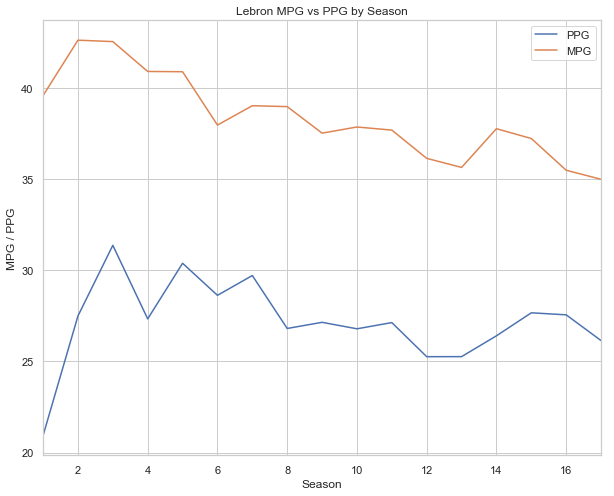

In [73]:
# Line plot to show Lebron's minutes per game against points per game for each season
MP_grouped_ppg = MP_grouped[['PPG','MPG']]
ax = MP_grouped_ppg.plot(kind='line', figsize=(10, 8))

ax.set_title('Lebron MPG vs PPG by Season')
ax.set_ylabel('MPG / PPG')
ax.set_xlabel('Season')

In [74]:
# New dataframe containing each stat
MP_grouped_ast = MP_grouped[['AstPG']]
MP_grouped_pm = MP_grouped[['PMPG']]
MP_grouped_gs = MP_grouped[['GSPG']]

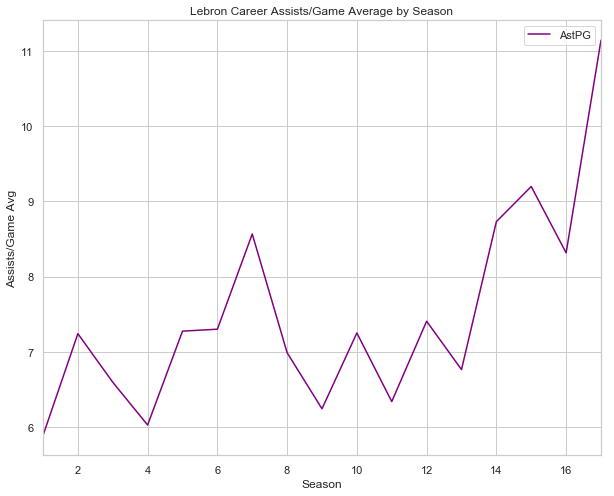

In [75]:
# Line chart visualizing assists/game for each season
MP_grouped_ast.plot(kind = 'line', figsize=(10,8), color='purple')
plt.title('Lebron Career Assists/Game Average by Season')
plt.xlabel('Season')
plt.ylabel('Assists/Game Avg')
plt.show()

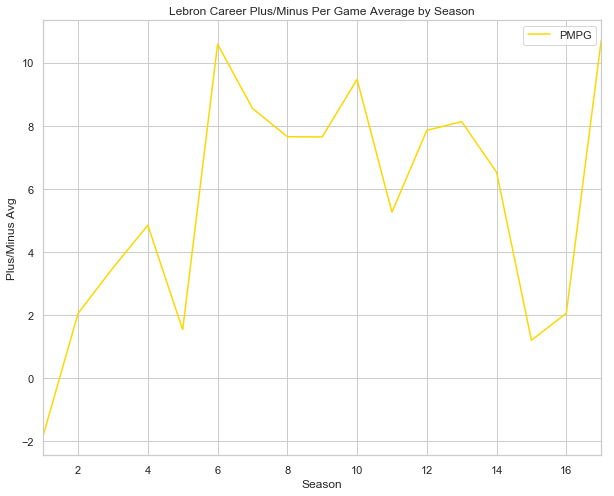

In [76]:
# Line chart visualizing plus/minus
MP_grouped_pm.plot(kind = 'line', figsize=(10,8), color='gold')
plt.title('Lebron Career Plus/Minus Per Game Average by Season')
plt.xlabel('Season')
plt.ylabel('Plus/Minus Avg')
plt.show()

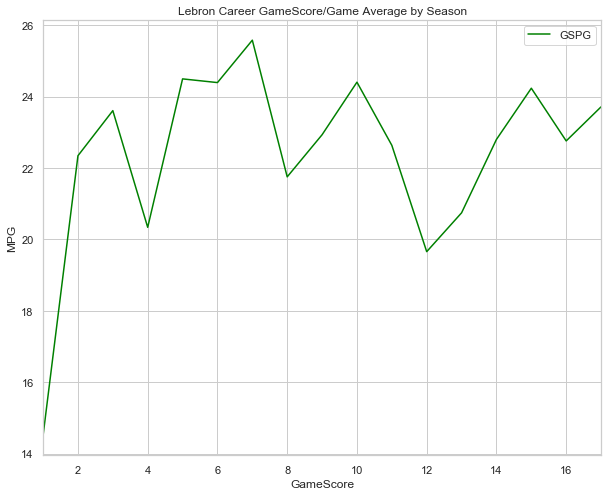

In [77]:
# Line chart visualizing GameScore
MP_grouped_gs.plot(kind = 'line', figsize=(10,8), color='green')
plt.title('Lebron Career GameScore/Game Average by Season')
plt.xlabel('GameScore')
plt.ylabel('MPG')
plt.show()

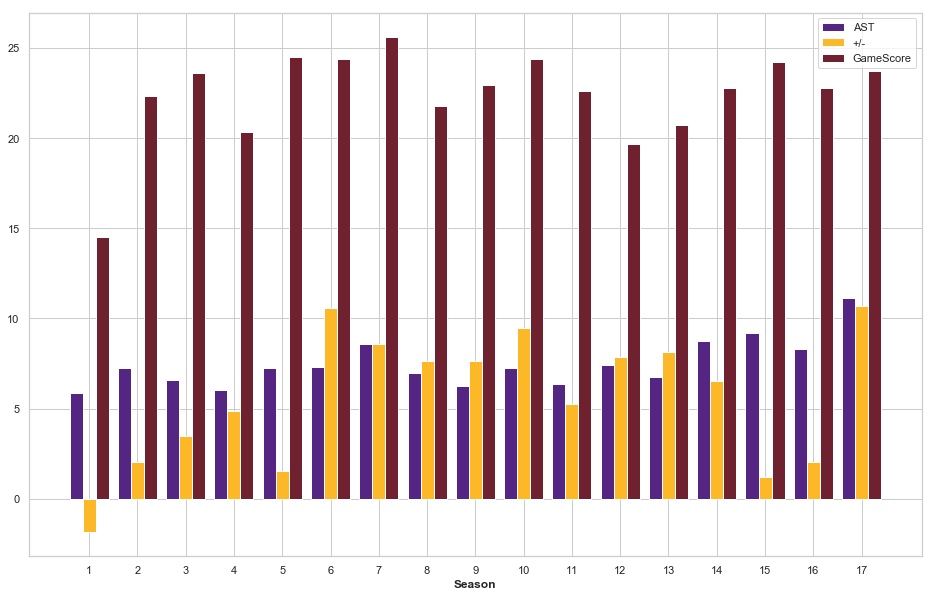

In [78]:
from matplotlib.pyplot import figure
# set width of bar
barWidth = 0.27
figure(figsize=(16,10))
 
# set height of bar
bars1 = MP_grouped_ast.AstPG
bars2 = MP_grouped_pm.PMPG
bars3 = MP_grouped_gs.GSPG
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#542583', width=barWidth, edgecolor='white', label='AST')
plt.bar(r2, bars2, color='#FDB827', width=barWidth, edgecolor='white', label='+/-')
plt.bar(r3, bars3, color='#6f212f', width=barWidth, edgecolor='white', label='GameScore')
 
# Add xticks on the middle of the group bars
plt.xlabel('Season', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['1', '2', '3', '4', '5', '6', '7', '8', 
                                                       '9', '10', '11', '12', '13', '14', '15', '16', '17'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [79]:
lebron_shooting = full_data[["MP-binned","3P%"]]
lebron_shooting.head()

,MP-binned,3P%
Date,,
10/29/2003,Above,0.0
10/30/2003,Average,0.2
11/1/2003,Average,0.0
11/5/2003,Average,0.0
11/7/2003,Above,0.5


In [80]:
lebron_shooting_avg = lebron_shooting.groupby(['MP-binned'],as_index=True).mean()
lebron_shooting_avg

,3P%
MP-binned,
Above,0.317054
Average,0.298381
Below,0.332011


In [81]:
lebron_stats = full_data[["MP-binned","AST", "TOV", "PF"]]
lebron_stats_avg = lebron_stats.groupby(['MP-binned'],as_index=True).mean()
lebron_stats_avg

,AST,TOV,PF
MP-binned,,,
Above,7.683333,3.590000,2.173333
Average,7.407035,3.624791,1.865997
Below,6.581395,3.112957,1.478405


In [82]:
lebron_key_stats = full_data[["MP-binned",'GmSc', '+/-']]
lebron_key_stats_avg = lebron_key_stats.groupby(['MP-binned'],as_index=True).mean()
lebron_key_stats_avg

,GmSc,+/-
MP-binned,,
Above,24.950000,1.920000
Average,22.411893,4.554439
Below,19.522259,10.325581


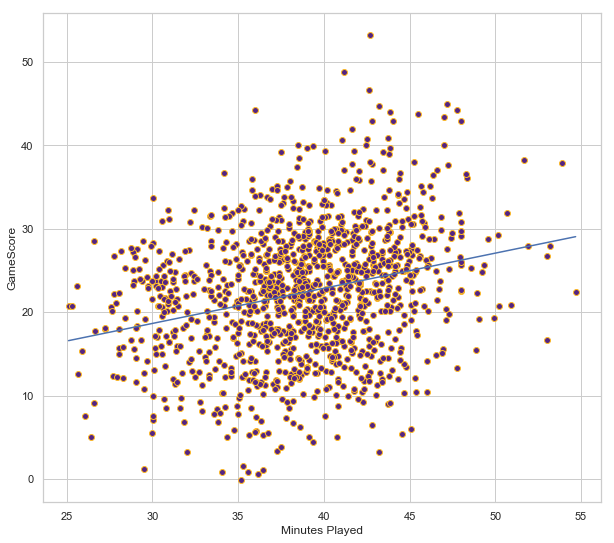

In [83]:
# Plot Lebron's GameScore against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data.GmSc, c='#542583', edgecolors='#FDB927')
plt.xlabel('Minutes Played')
plt.ylabel('GameScore')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data.GmSc, 1))(np.unique(full_data['MP'])))
plt.show()

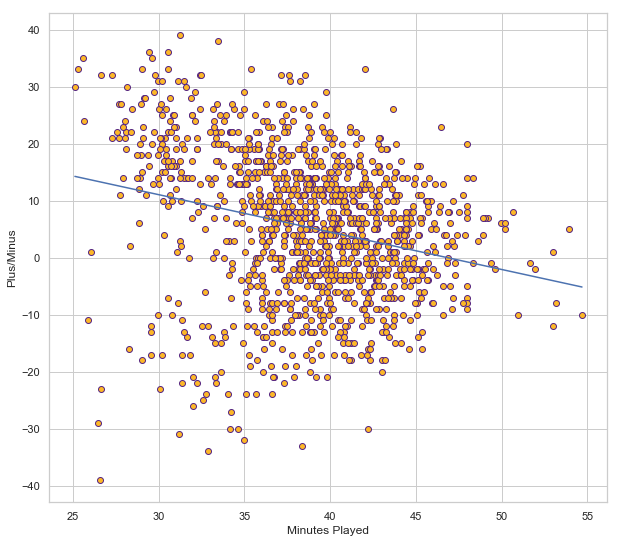

In [84]:
# Plot Lebron's Plus/Minus against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['+/-'], c='#FDB827', edgecolors='#552583')
plt.xlabel('Minutes Played')
plt.ylabel('Plus/Minus')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['+/-'], 1))(np.unique(full_data['MP'])))
plt.show()

In [85]:
lebron_key_stats.head(10)

,MP-binned,GmSc,+/-
Date,,,
10/29/2003,Above,24.7,-9
10/30/2003,Average,14.7,-3
11/1/2003,Average,5.0,-21
11/5/2003,Average,11.2,-3
11/7/2003,Above,9.0,-7
11/8/2003,Above,15.7,14
11/10/2003,Below,15.8,20
11/12/2003,Above,12.8,-4
11/14/2003,Below,0.8,-1


In [86]:
# Create a dataframe for all the games where Lebron played the "below" range of minutes
lebron_key_below = lebron_key_stats[lebron_key_stats['MP-binned'] == 'Below']
lebron_key_below.shape

(301, 3)

In [87]:
# Create dataframes for other two bins
lebron_key_average = lebron_key_stats[lebron_key_stats['MP-binned'] == 'Average']
lebron_key_above = lebron_key_stats[lebron_key_stats['MP-binned'] == 'Above']

#confirm dataframes are correct size
print("Average dataframe size: ", lebron_key_average.shape[0])
print("Above dataframe size: ", lebron_key_above.shape[0])

Average dataframe size:  597
Above dataframe size:  300


Text(0.5, 1.0, 'Lebron GameScore performance by MP bin')

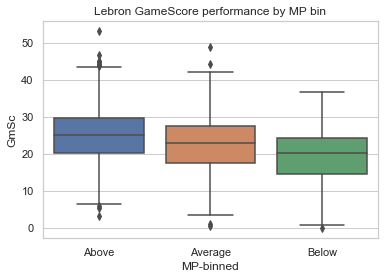

In [88]:
# Box plot of GameScore results for each bin
ax = sns.boxplot(x="MP-binned", y="GmSc", data=lebron_key_stats)
ax.set_title("Lebron GameScore performance by MP bin")

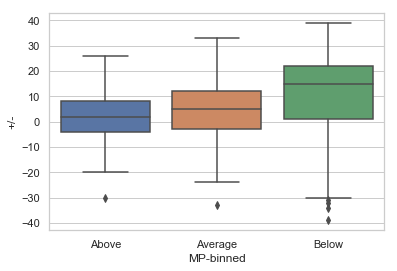

In [89]:
# Box plot of Plus/minus results for each bin
ax = sns.boxplot(x="MP-binned", y="+/-", data=lebron_key_stats)

In [90]:
# Create a new dataframe to hold these per minute stats
lebron_per_minute = full_data[["MP-binned",'GmSc/min', 'PM/min']]
lebron_per_minute_avg = lebron_per_minute.groupby(['MP-binned'],as_index=True).mean()
lebron_per_minute_avg

,GmSc/min,PM/min
MP-binned,,
Above,0.558132,0.042840
Average,0.575634,0.117816
Below,0.609833,0.331071


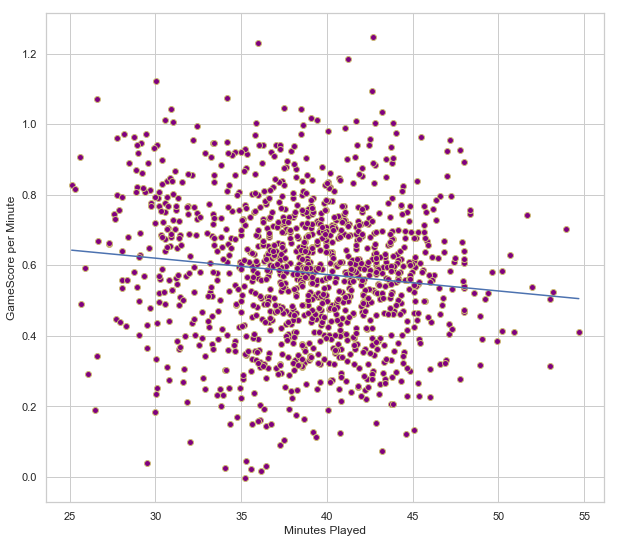

In [91]:
# Plot Lebron's GmSc/min against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['GmSc/min'], c='purple', edgecolors='y')
plt.xlabel('Minutes Played')
plt.ylabel('GameScore per Minute')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['GmSc/min'], 1))(np.unique(full_data['MP'])))
plt.show()

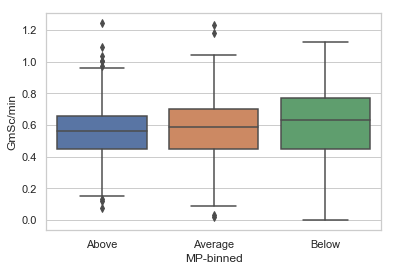

In [92]:
# Box plot of GameScore/min results for each bin
ax = sns.boxplot(x="MP-binned", y="GmSc/min", data=lebron_per_minute)

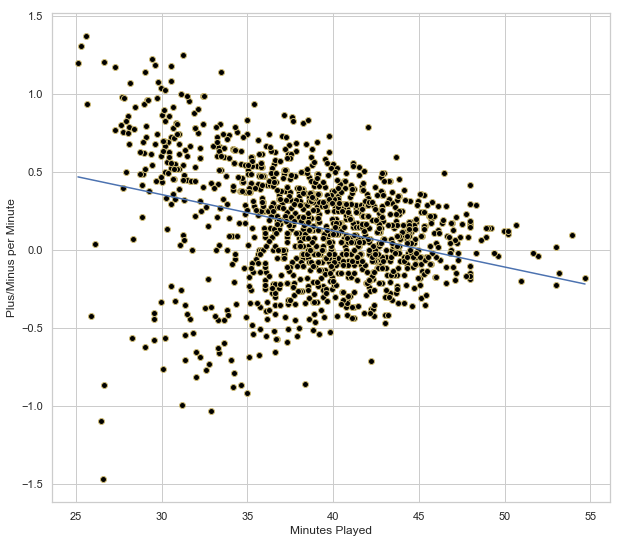

In [93]:
# Plot Lebron's +/-/min against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['PM/min'], c='black', edgecolors='y')
plt.xlabel('Minutes Played')
plt.ylabel('Plus/Minus per Minute')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['PM/min'], 1))(np.unique(full_data['MP'])))
plt.show()

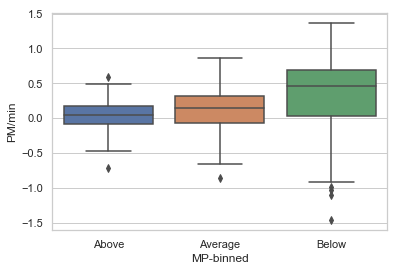

In [94]:
ax = sns.boxplot(x="MP-binned", y="PM/min", data=lebron_per_minute)

In [95]:
full_data.columns

Index(['Season', 'G', 'Tm', '@', 'Opp', 'Result', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'MP-binned',
       'GmSc/min', 'PM/min', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'USG%', 'PACE', 'PIE'],
      dtype='object')

In [96]:
# create a new dataframe with the 6 attributes against binned-minutes
lebron_advanced = full_data[["MP-binned",'OFFRTG', 'DEFRTG','NETRTG','EFG%','TS%','PIE']]
lebron_advanced_avg = lebron_advanced.groupby(['MP-binned'],as_index=True).mean()
lebron_advanced_avg

,OFFRTG,DEFRTG,NETRTG,EFG%,TS%,PIE
MP-binned,,,,,,
Above,108.197333,106.431333,1.764000,51.814333,57.021667,19.307333
Average,110.001843,104.222446,5.779062,54.129983,58.684422,19.410385
Below,115.418272,98.859136,16.561794,56.974086,60.945847,20.079402


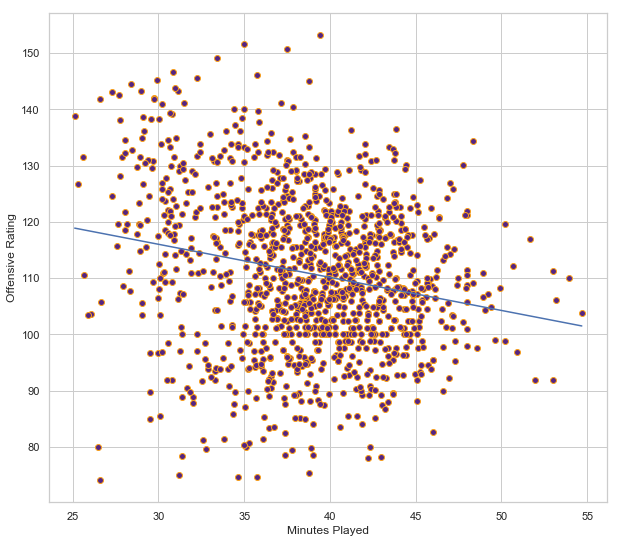

In [97]:
# Plot Lebron's OFFRTG against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data.OFFRTG, c='#552583', edgecolors='#F9A01B')
plt.xlabel('Minutes Played')
plt.ylabel('Offensive Rating')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data.OFFRTG, 1))(np.unique(full_data['MP'])))
plt.show()

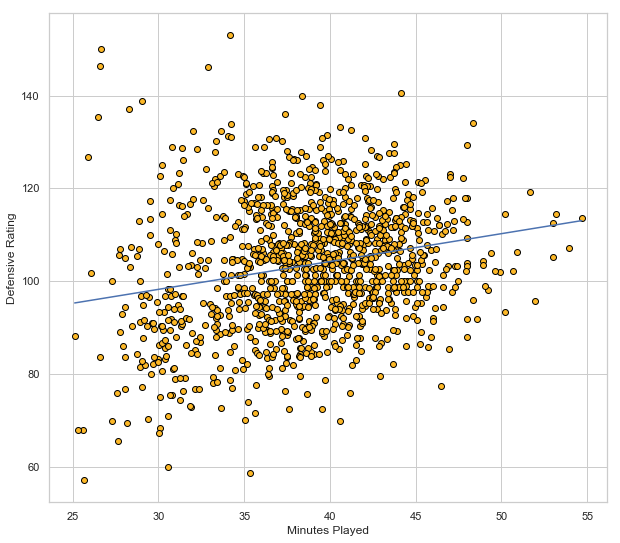

In [98]:
# Plot Lebron's DEFRTG against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data.DEFRTG, c='#FDB827', edgecolors='black')
plt.xlabel('Minutes Played')
plt.ylabel('Defensive Rating')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data.DEFRTG, 1))(np.unique(full_data['MP'])))
plt.show()

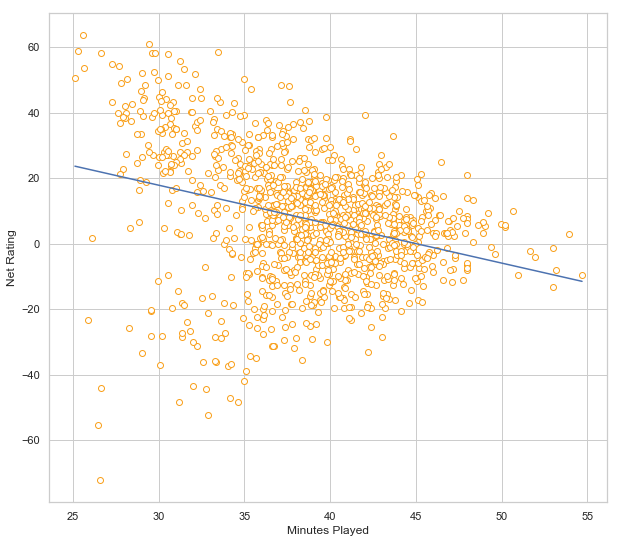

In [99]:
# Plot Lebron's Net Rating against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data.NETRTG, c='white', edgecolors='#F9A01B')
plt.xlabel('Minutes Played')
plt.ylabel('Net Rating')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data.NETRTG, 1))(np.unique(full_data['MP'])))
plt.show()

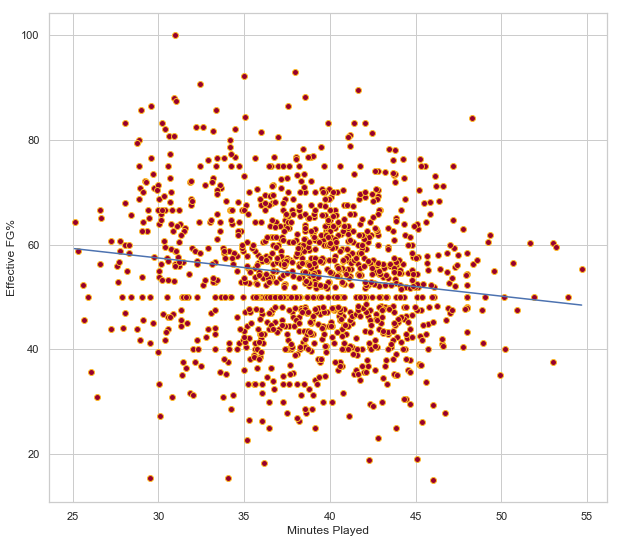

In [100]:
# Plot Lebron's EFG% against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['EFG%'], c='#98002E', edgecolors='#FDB927')
plt.xlabel('Minutes Played')
plt.ylabel('Effective FG%')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['EFG%'], 1))(np.unique(full_data['MP'])))
plt.show()

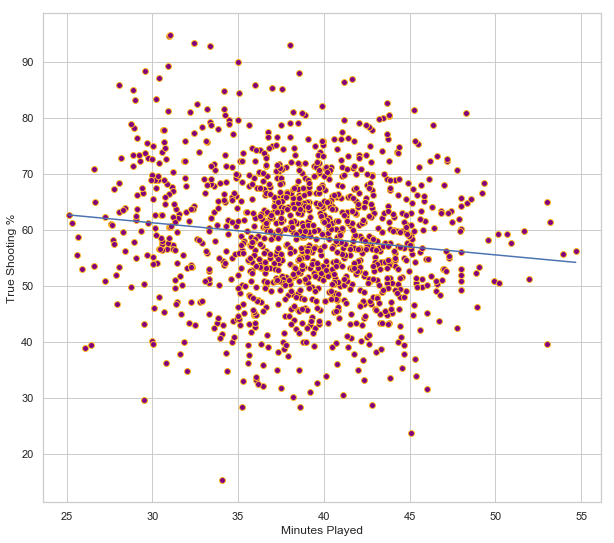

In [101]:
# Plot Lebron's EFG% against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['TS%'], c='purple', edgecolors='#FDB927')
plt.xlabel('Minutes Played')
plt.ylabel('True Shooting %')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['TS%'], 1))(np.unique(full_data['MP'])))
plt.show()

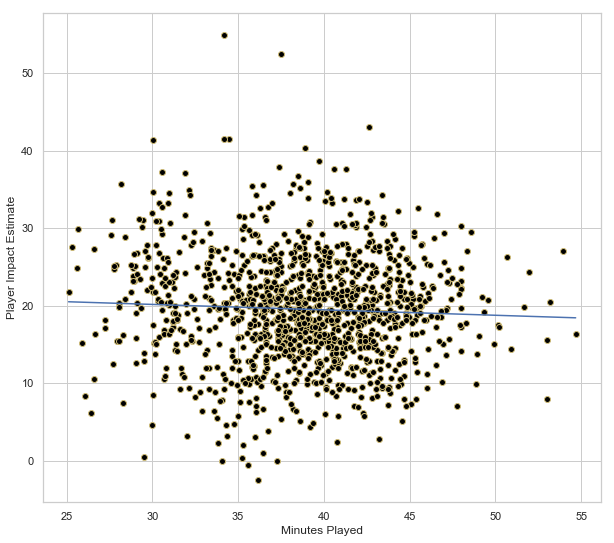

In [102]:
# Plot Lebron's EFG% against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['PIE'], c='black', edgecolors='y')
plt.xlabel('Minutes Played')
plt.ylabel('Player Impact Estimate')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['PIE'], 1))(np.unique(full_data['MP'])))
plt.show()

In [103]:
# Create and add new column to dataframe by dividing OFFRTG series by MP series
full_data['OFFRTG/min'] = full_data['OFFRTG'] / full_data['MP']
# Create and add new column to dataframe by dividing DEFRTG series by MP series
full_data['DEFRTG/min'] = full_data['DEFRTG'] / full_data['MP']

In [104]:
# Create and add new column to dataframe by dividing DEFRTG series by MP series
full_data['PIE/min'] = full_data['PIE'] / full_data['MP']

In [105]:
# Create a new dataframe to hold these per minute stats
rtg_per_min = full_data[["MP-binned",'OFFRTG/min', 'DEFRTG/min']]
rtg_per_min_avg = rtg_per_min.groupby(['MP-binned'],as_index=True).mean()
rtg_per_min_avg

,OFFRTG/min,DEFRTG/min
MP-binned,,
Above,2.426607,2.387182
Average,2.831269,2.681331
Below,3.616967,3.082405


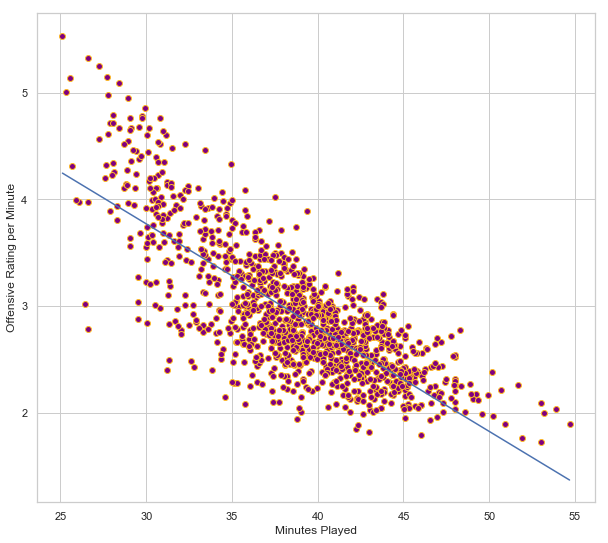

In [106]:
# Plot Lebron's OffRTG/Min against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['OFFRTG/min'], c='purple', edgecolors='#FDB927')
plt.xlabel('Minutes Played')
plt.ylabel('Offensive Rating per Minute')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['OFFRTG/min'], 1))(np.unique(full_data['MP'])))
plt.show()

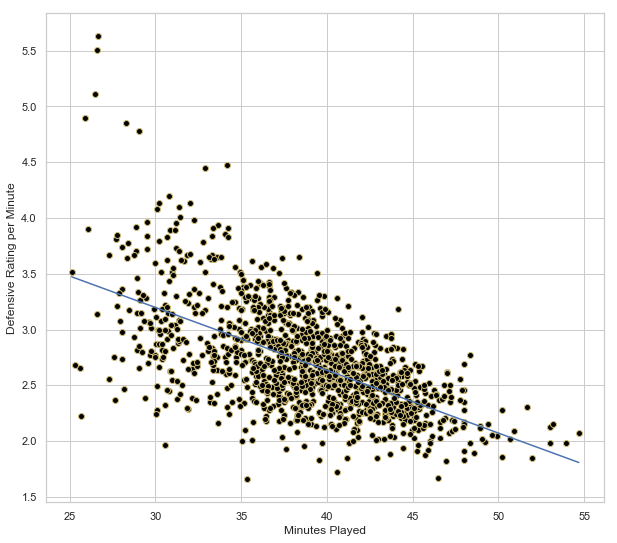

In [107]:
# Plot Lebron's DEFRTG/min against minutes played
plt.figure(figsize=(10, 9))
plt.scatter(full_data['MP'], full_data['DEFRTG/min'], c='black', edgecolors='y')
plt.xlabel('Minutes Played')
plt.ylabel('Defensive Rating per Minute')
plt.plot(np.unique(full_data['MP']), np.poly1d(np.polyfit(full_data['MP'], full_data['DEFRTG/min'], 1))(np.unique(full_data['MP'])))
plt.show()